# Módulo 12: Modelos  de Regressão
# Exercício 3: Regressão Múltipla

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [375]:
# carregando bibliotecas

import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings

%matplotlib inline

In [376]:
# Desativar avisos de FutureWarning específicos

warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

In [377]:
# carregando arquivo, construindo DataFrame e calculando colunas

tips = sns.load_dataset("tips")                                      # base de dados do "seaborn"
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])   # porcentagem da gorjeta
tips['net_bill'] = tips['total_bill'] - tips['tip']                  # valor líquido da gorjeta

In [378]:
# informações sobre os dados

tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [379]:
# regressão múltipla usando "statsmodels.formula.api" - em função de 'tip'

reg_original = smf.ols('tip ~ sex + smoker + time + net_bill', data = tips).fit()

# resumo
# reg_original = em função de 'tip'
# y = 'tip'
# X = 'sex' + 'smoker' + 'time' + 'net_bill'

In [380]:
# resíduo - em função de 'tip'

tips['res_tip'] = reg_original.resid

reg_original.summary()

# resumo:
# resíduo do y = 'tip'
# R-quadrado = 0.335
# 'P>|t|' maior que 5% = variável não é estatisticamente significante
# vamos tirar a variável 'sex' pois tem 'P>|t| = 0.982' que é maior que 5%
# vamos tirar a variável 'time' pois tem 'P>|t| = 0.721' que é maior que 5%

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           2.64e-20
Time:                        16:20:36   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [381]:
# regressão múltipla usando "statsmodels.formula.api" - sem a variável 'sex'
#                                                     - sem a variável 'time'

reg_original_sem_variaveis = smf.ols('tip ~ smoker + net_bill', data = tips).fit()

# resumo
# # reg_original_sem_variaveis = em função de 'tip' sem 'sex' e 'time'
# y = 'tip'
# X = smoker' + 'net_bill'

In [382]:
# resíduo - sem a variável 'sex'
#         - sem a variável 'time'

tips['res_tip'] = reg_original_sem_variaveis.resid
residuos = reg_original_sem_variaveis.resid
reg_original_sem_variaveis.summary()

# resumo:
# resíduo do y = 'tip'
# R-quadrado = 0.335
# 'P>|t|' maior que 5% = variável não é estatisticamente significante


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.67
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           4.56e-22
Time:                        16:20:39   Log-Likelihood:                -375.20
No. Observations:                 244   AIC:                             756.4
Df Residuals:                     241   BIC:                             766.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.2318      0.200      6.172      0.000       0.839       1.625
smoker[T.No]     0.1385      0.150      0.923      0.357      -0.157       0.434
net_bill         0.1001      0.009     11.015      0.000       0.082       0.118
==============================================================================
Omnibus:                       37.031   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.928
Skew:                           0.809   Prob(JB):                     2.93e-15
Kurtosis:                       4.991   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

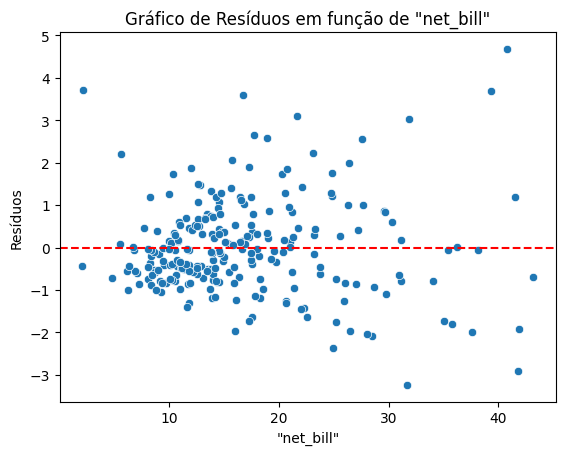

In [383]:
# gráfico de resíduos em função de 'net_bill' - sem a variável 'sex'
#                                             - sem a variável 'time'

sns.scatterplot(x = 'net_bill', y = 'res_tip', data = tips)
plt.axhline(y  =0, color = 'r', linestyle = '--')

plt.xlabel('"net_bill"')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos em função de "net_bill"')
plt.show()

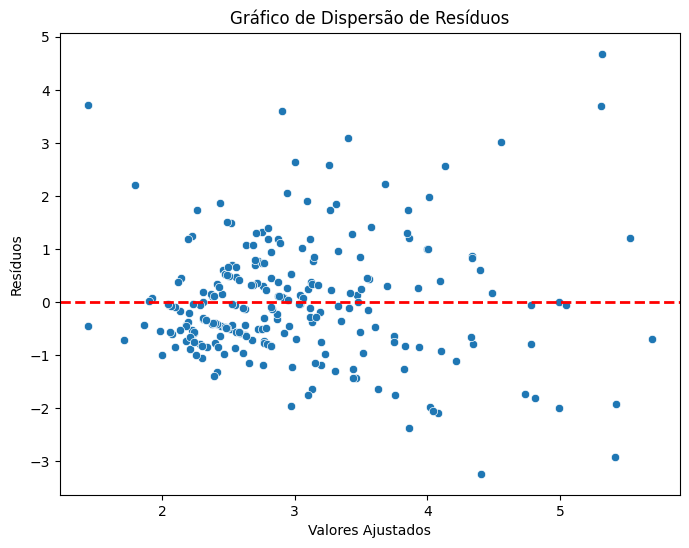

In [384]:
# gráfico com valores de dispersão de resíduos em relação aos valores ajustados 

plt.figure(figsize=(8, 6))
sns.scatterplot(x=reg_original_sem_variaveis.fittedvalues, y=residuos)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)  # Linha horizontal em y=0
plt.title('Gráfico de Dispersão de Resíduos')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.show()



In [385]:
# MODELO 2
# 1º TESTE:  transformar 'net_bill' no LOGARITMO


reg_original_sem_variaveis_log = smf.ols('tip ~ smoker + np.log(net_bill)', data = tips).fit()

# resumo
# # reg_original_sem_variaveis_log = em função de 'tip' sem 'sex' e 'time'
# y = 'tip'
# X = 'smoker' + 'log(net_bill)'


In [386]:
# resíduo - testando transformar 'net_bill' no LOGARITMO

tips['res_tip'] = reg_original_sem_variaveis_log.resid

reg_original_sem_variaveis_log.summary()

# resumo:
# resíduo do y = 'tip'
# R-quadrado = 0.295
# 'P>|t|' maior que 5% = variável não é estatisticamente significante


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     50.34
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           5.38e-19
Time:                        16:20:48   Log-Likelihood:                -382.36
No. Observations:                 244   AIC:                             770.7
Df Residuals:                     241   BIC:                             781.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2890      0.445     -2.896      0.004      -2.166      -0.412
smoker[T.No]         0.0433      0.154      0.282      0.779      -0.260       0.347
np.log(net_bill)     1.5712      0.157     10.034      0.000       1.263       1.880
==============================================================================
Omnibus:                       75.168   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.823
Skew:                           1.320   Prob(JB):                     3.38e-50
Kurtosis:                       6.929   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [387]:
# MODELO 2
# 2º TESTE:  transformar 'net_bill' em POLINÔMIO

tips['pow_net_bill'] = np.power(tips['net_bill'], 2)
reg_original_sem_variaveis_pow = smf.ols('tip ~ smoker + pow_net_bill', data=tips).fit()

# resumo
# # reg_original_sem_variaveis_pow = em função de 'tip' sem 'sex' e 'time'
# y = 'tip'
# X = 'smoker' + 'power(net_bill)'


In [388]:
# resíduo - testando transformar 'net_bill' em POLINÔMIO

tips['res_tip'] = reg_original_sem_variaveis_pow.resid

reg_original_sem_variaveis_pow.summary()

# resumo:
# resíduo do y = 'tip'
# R-quadrado = 0.304
# 'P>|t|' maior que 5% = variável não é estatisticamente significante

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     52.69
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           1.04e-19
Time:                        16:20:52   Log-Likelihood:                -380.70
No. Observations:                 244   AIC:                             767.4
Df Residuals:                     241   BIC:                             777.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1421      0.147     14.586      0.000       1.853       2.431
smoker[T.No]     0.1696      0.154      1.102      0.271      -0.133       0.473
pow_net_bill     0.0022      0.000     10.265      0.000       0.002       0.003
==============================================================================
Omnibus:                       25.317   Durbin-Watson:                   2.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.501
Skew:                           0.672   Prob(JB):                     1.95e-08
Kurtosis:                       4.298   Cond. No.                     1.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Escolha do Modelo entre o LOGARITMO - **log(net_bill)** e o POLINÔMIO - **power(net_bill)**: 
- O modelo que mais explica a variável **'tip'** - gorjeta é o **POLINÔMIO** de **'net_bill'** pois apresenta o R-quadrado maior de **0.304**.


### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [389]:
# carregando arquivo, construindo DataFrame e calculando colunas

tips = sns.load_dataset("tips")                                      # base de dados do "seaborn"
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])   # porcentagem da gorjeta
tips['net_bill'] = tips['total_bill'] - tips['tip']                  # valor líquido da gorjeta

In [390]:
# informações sobre os dados

tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [391]:
# regressão múltipla usando "statsmodels.formula.api" - em função de 'tip_pct'

reg_original = smf.ols('tip_pct ~ sex + smoker + time + net_bill', data = tips).fit()

# resumo
# reg_original = em função de 'tip_pct'
# y = 'tip_pct'
# X = 'sex' + 'smoker' + 'time' + 'net_bill'

In [392]:
# resíduo - em função de 'tip_pct'

tips['res_tip_pct'] = reg_original.resid

reg_original.summary()

# resumo:
# resíduo do y = 'tip_pct'
# R-quadrado = 0.107
# 'P>|t|' maior que 5% = variável não é estatisticamente significante
# vamos tirar a variável 'sex' pois tem 'P>|t| = 0.749' que é maior que 5%

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     7.157
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           1.85e-05
Time:                        16:20:59   Log-Likelihood:                 110.12
No. Observations:                 244   AIC:                            -210.2
Df Residuals:                     239   BIC:                            -192.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3216      0.033      9.698      0.000       0.256       0.387
sex[T.Female]     -0.0069      0.021     -0.321      0.749      -0.049       0.035
smoker[T.No]      -0.0351      0.021     -1.700      0.090      -0.076       0.006
time[T.Dinner]     0.0221      0.023      0.961      0.337      -0.023       0.067
net_bill          -0.0066      0.001     -5.191      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      461.972   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           218184.236
Skew:                          10.789   Prob(JB):                         0.00
Kurtosis:                     147.897   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [393]:
# regressão múltipla usando "statsmodels.formula.api" - sem a variável 'sex'

reg_original_sem_variavel = smf.ols('tip_pct ~ smoker + time +  net_bill', data = tips).fit()

# resumo
# reg_original_sem_variavel = = em função de 'tip_pct' sem 'sex' 
# y = 'tip_pct'
# X = 'smoker' + 'time' + 'net_bill'

In [394]:
# resíduo - sem a variável 'sex'

tips['res_tip_pct'] = reg_original_sem_variavel.resid

reg_original_sem_variavel.summary()

# resumo:
# resíduo do y = 'tip'
# R-quadrado = 0.107
# 'P>|t|' maior que 5% = variável não é estatisticamente significante

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     9.544
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           5.60e-06
Time:                        16:21:01   Log-Likelihood:                 110.07
No. Observations:                 244   AIC:                            -212.1
Df Residuals:                     240   BIC:                            -198.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3173      0.030     10.474      0.000       0.258       0.377
smoker[T.No]      -0.0350      0.021     -1.698      0.091      -0.076       0.006
time[T.Dinner]     0.0235      0.023      1.040      0.299      -0.021       0.068
net_bill          -0.0066      0.001     -5.197      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      462.732   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           220135.338
Skew:                          10.824   Prob(JB):                         0.00
Kurtosis:                     148.547   Cond. No.                         64.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

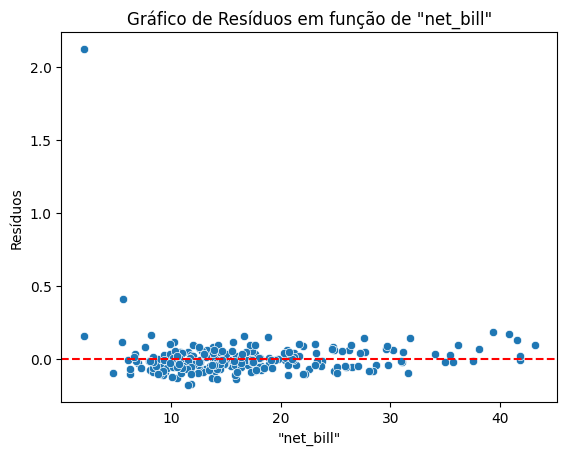

In [395]:
# gráfico de resíduos em função de 'net_bill' - sem a variável 'sex'

sns.scatterplot(x = 'net_bill', y = 'res_tip_pct', data = tips)
plt.axhline(y  =0, color = 'r', linestyle = '--')

plt.xlabel('"net_bill"')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos em função de "net_bill"')
plt.show()

In [396]:
# MODELO 3
# 1º TESTE:  transformar 'net_bill' no LOGARITMO


reg_original_sem_variavel_log = smf.ols('tip_pct ~ smoker + time + np.log(net_bill)', data = tips).fit()

# resumo
# reg_original_sem_variavel_log = = em função de 'tip_pct' sem 'sex' e com "log(net_bill)"
# y = 'tip_pct'
# X = 'smoker' + 'time' +'log(net_bill)'

In [397]:
# resíduo - testando transformar 'net_bill' no LOGARITMO

tips['res_tip_pct'] = reg_original_sem_variavel_log.resid

reg_original_sem_variavel_log.summary()

# resumo:
# resíduo do y = 'tip_pct'
# R-quadrado = 0.218
# 'P>|t|' maior que 5% = variável não é estatisticamente significante

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     22.32
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           8.78e-13
Time:                        16:21:07   Log-Likelihood:                 126.35
No. Observations:                 244   AIC:                            -244.7
Df Residuals:                     240   BIC:                            -230.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6313      0.056     11.306      0.000       0.521       0.741
smoker[T.No]        -0.0304      0.019     -1.586      0.114      -0.068       0.007
time[T.Dinner]       0.0319      0.021      1.510      0.132      -0.010       0.073
np.log(net_bill)    -0.1598      0.020     -8.070      0.000      -0.199      -0.121
==============================================================================
Omnibus:                      433.178   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           157410.912
Skew:                           9.519   Prob(JB):                         0.00
Kurtosis:                     125.966   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

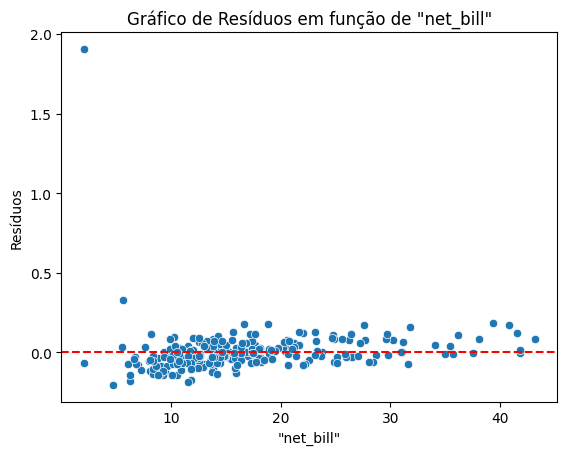

In [398]:
# gráfico de resíduos em função de 'net_bill' - sem a variável 'sex'

sns.scatterplot(x = 'net_bill', y = 'res_tip_pct', data = tips)
plt.axhline(y  =0, color = 'r', linestyle = '--')

plt.xlabel('"net_bill"')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos em função de "net_bill"')
plt.show()

In [399]:
# MODELO 3
# 2º TESTE:  transformar 'net_bill' em POLINÔMIO

tips['pow_net_bill'] = np.power(tips['net_bill'], 2)
reg_original_sem_variavel_power = smf.ols('tip_pct ~ smoker + time + pow_net_bill', data=tips).fit()

# resumo
# reg_original_sem_variavel_power = = em função de 'tip_pct' sem 'sex' e com "power(net_bill)"
# y = 'tip_pct'
# X = 'smoker' + 'time' + 'power(net_bill)'


In [400]:
# resíduo - testando transformar 'net_bill' em POLINÔMIO

tips['res_tip_pct'] = reg_original_sem_variavel_power.resid

reg_original_sem_variavel_power.summary()

# resumo:
# resíduo do y = 'tip'
# R-quadrado = 0.066
# 'P>|t|' maior que 5% = variável não é estatisticamente significante

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     5.643
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           0.000942
Time:                        16:21:11   Log-Likelihood:                 104.64
No. Observations:                 244   AIC:                            -201.3
Df Residuals:                     240   BIC:                            -187.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.2515      0.025      9.903      0.000       0.201       0.302
smoker[T.No]      -0.0350      0.021     -1.657      0.099      -0.077       0.007
time[T.Dinner]     0.0168      0.023      0.730      0.466      -0.029       0.062
pow_net_bill      -0.0001   2.94e-05     -3.922      0.000      -0.000   -5.73e-05
==============================================================================
Omnibus:                      466.847   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           229841.234
Skew:                          11.018   Prob(JB):                         0.00
Kurtosis:                     151.734   Cond. No.                     1.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Escolha do Modelo entre o LOGARITMO - **log(net_bill)** e o POLINÔMIO - **power(net_bill)**: 
- O modelo que mais explica a variável **'tip_pct'** - porcentagem da gorjeta é o **LOGARITMO** de **'net_bill'** pois apresenta o R-quadrado maior de **0.280**.


In [401]:
# Calculando o R-quadrado de "tip" em função de "net_bill" - sem log

r_squared = reg_original_sem_variavel.rsquared

print('O R-quadrado de "tip" em função de "net_bill" remoção de variável é:')
print(r_squared)

# resumo:
# usando "reg_original_sem_variavel"

O R-quadrado de "tip" em função de "net_bill" remoção de variável é:
0.10658148428901004


In [402]:
# Calculando o R-quadrado de "tip" em função de "net_bill" - item 1 - sem a remoção de variáveis

r_squared = reg_original.rsquared

print('O R-quadrado de "tip" em função de "net_bill" do item 1 COM remoção de variável é:')
print(r_squared)

# resumo:
# usando "reg_original"

O R-quadrado de "tip" em função de "net_bill" do item 1 COM remoção de variável é:
0.10696535270494645


#### Comparação dos R-quadrados entre o modelo do item 1 - sem remoção de variáveis e do modelo com remoção de variáveis: 
- Não há mudança significativa entre os dois modelos.


### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [403]:
# carregando arquivo e construindo DataFrame

arquivo = pd.read_csv('PREVISAO_DE_RENDA.csv')
df_previsao = pd.DataFrame(arquivo)


In [404]:
# informações sobre os tipos dos dados

df_previsao.dtypes

Unnamed: 0                 int64
data_ref                  object
index                      int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
mau                         bool
renda                    float64
dtype: object

In [405]:
# informações sobre os dados

df_previsao.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [406]:
# informações sobre o número de linhas e colunas do dataFrame

print(f'O número de "linhas" do DataFrame é:   {df_previsao.shape[0]}')
print(f'O número de "colunas" do DataFrame é:   {df_previsao.shape[1]}')

O número de "linhas" do DataFrame é:   15000
O número de "colunas" do DataFrame é:   16


In [407]:
# verificando dados faltantes

df_previsao.isna().sum()

Unnamed: 0                  0
data_ref                    0
index                       0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2534
qt_pessoas_residencia       0
mau                         0
renda                       0
dtype: int64

In [408]:
# observando a porcentagem de dados faltantes

porcentagem_dados_faltantes = (df_previsao.isnull().sum() / len(df_previsao)) * 100
porcentagem_dados_faltantes

Unnamed: 0                0.000000
data_ref                  0.000000
index                     0.000000
sexo                      0.000000
posse_de_veiculo          0.000000
posse_de_imovel           0.000000
qtd_filhos                0.000000
tipo_renda                0.000000
educacao                  0.000000
estado_civil              0.000000
tipo_residencia           0.000000
idade                     0.000000
tempo_emprego            16.893333
qt_pessoas_residencia     0.000000
mau                       0.000000
renda                     0.000000
dtype: float64

In [409]:
# dropar todas as linhas de "tempo_emprego" que tenha NA
# sobrescrever o dataframe "df_previsao"

df_previsao.dropna(subset=['tempo_emprego'], inplace=True)

In [410]:
# informações sobre o número de linhas e colunas do dataFrame depois de dropar

print(f'O número de "linhas" do DataFrame é:   {df_previsao.shape[0]}')
print(f'O número de "colunas" do DataFrame é:   {df_previsao.shape[1]}')

O número de "linhas" do DataFrame é:   12466
O número de "colunas" do DataFrame é:   16


In [411]:
# MODELO 1
# modelo de regressão simples para as variáveis "renda" (resposta) e "tempo_emprego" (explicativa)

reg = smf.ols('renda ~ tempo_emprego', data = df_previsao).fit()

# Resumo da regressão
# modelo de regressão é a linha de tendência nos gráficos


In [412]:
# resíduo 

df_previsao['res_renda'] = reg.resid
residuos = reg.resid
reg.summary()

# resumo:
# resíduo do y = 'renda'
# R-quadrado = 0.155
# 'P>|t|' maior que 5% = variável não é estatisticamente significante

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Mon, 04 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:21:24   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561      0.000    2534.525    2773.366
tempo_emprego   283.3509      5.916     47.892      0.000     271.754     294.948
==============================================================================
Omnibus:                     9974.393   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           387626.996
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      29.373   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

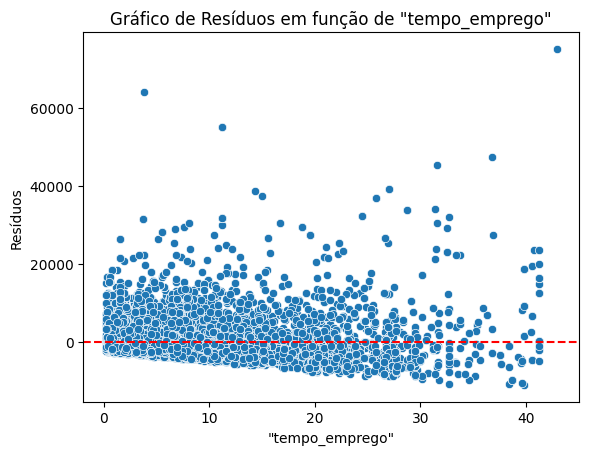

In [413]:
# gráfico de resíduos 

sns.scatterplot(x = 'tempo_emprego', y = 'res_renda', data = df_previsao)
plt.axhline(y  =0, color = 'r', linestyle = '--')

plt.xlabel('"tempo_emprego"')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos em função de "tempo_emprego"')
plt.show()

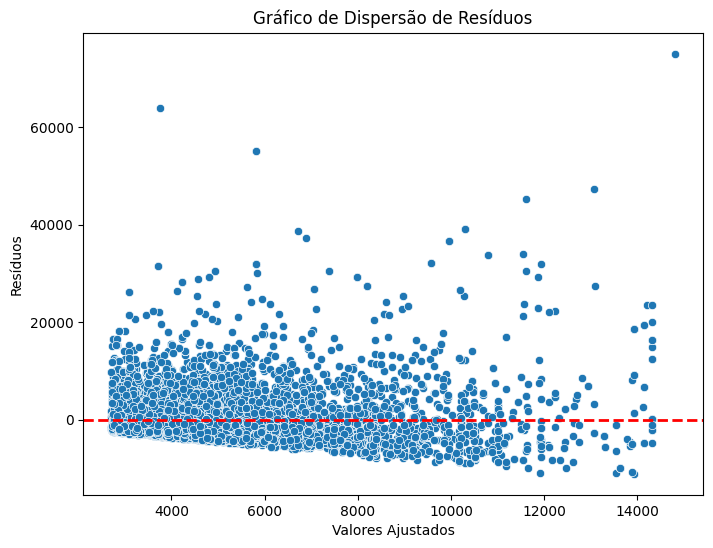

In [414]:
# gráfico com valores de dispersão de resíduos em relação aos valores ajustados 

plt.figure(figsize=(8, 6))
sns.scatterplot(x=reg.fittedvalues, y=residuos)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)  # Linha horizontal em y=0
plt.title('Gráfico de Dispersão de Resíduos')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.show()

#### Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
- **Resposta**:
- Observando  o gráfico de resíduos eu não mudaria a regressão. Ele me parece razoável para uma regressão linear simples, ou seja, com apenas uma variavél (X).

In [415]:
# regressão múltipla usando "statsmodels.formula.api" - em função de 'renda'

reg_original = smf.ols('renda ~  sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + idade + tempo_emprego + qt_pessoas_residencia', data = df_previsao).fit()



In [416]:
# resíduo - em função de 'renda'

df_previsao['res_renda'] = reg_original.resid

reg_original.summary()

# resumo:
# resíduo do y = 'renda'
# R-quadrado = 0.207
# 'P>|t|' maior que 5% = variável não é estatisticamente significante
# vamos tirar a variável 'posse_de_veiculo' pois tem 'P>|t| = 0.901' que é maior que 5%
# vamos tirar a variável 'qtd_filhos' pois tem 'P>|t| = 0.830' que é maior que 5%
# vamos tirar a variável 'qt_pessoas_residencia' pois tem 'P>|t| = 0.854' que é maior que 5%

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     465.0
Date:                Mon, 04 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:21:30   Log-Likelihood:            -1.2210e+05
No. Observations:               12466   AIC:                         2.442e+05
Df Residuals:                   12458   BIC:                         2.443e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  356.9968    259.561      1.375      0.169    -151.784     865.777
sexo[T.M]                 2290.6318     87.738     26.108      0.000    2118.653    2462.611
posse_de_veiculo[T.True]    10.5236     84.707      0.124      0.901    -155.515     176.562
posse_de_imovel[T.True]    431.1127     82.059      5.254      0.000     270.265     591.961
qtd_filhos                  25.2589    117.514      0.215      0.830    -205.086     255.604
idade                       25.4366      4.612      5.515      0.000      16.396      34.477
tempo_emprego              296.1088      6.103     48.516      0.000     284.145     308.072
qt_pessoas_residencia       18.1134     98.428      0.184      0.854    -174.822     211.048
==============================================================================
Omnibus:                    10141.627   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           439477.021
Skew:                           3.613   Prob(JB):                         0.00
Kurtosis:                      31.176   Cond. No.                         302.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [417]:
# regressão múltipla usando "statsmodels.formula.api" - em função de 'renda' sem variáveis

reg_original_sem_variaveis = smf.ols('renda ~  sexo + posse_de_imovel + idade + tempo_emprego', data = df_previsao).fit()



In [418]:
# resíduo - em função de 'renda' - sem variáveis

df_previsao['res_renda'] = reg_original_sem_variaveis.resid

reg_original_sem_variaveis.summary()

# resumo:
# resíduo do y = 'renda'
# R-quadrado = 0.207
# 'P>|t|' maior que 5% = variável não é estatisticamente significante


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     813.7
Date:                Mon, 04 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:21:32   Log-Likelihood:            -1.2210e+05
No. Observations:               12466   AIC:                         2.442e+05
Df Residuals:                   12461   BIC:                         2.442e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 455.8353    186.029      2.450      0.014      91.190     820.481
sexo[T.M]                2299.6921     82.355     27.924      0.000    2138.263    2461.121
posse_de_imovel[T.True]   434.8417     81.921      5.308      0.000     274.264     595.420
idade                      24.3007      4.427      5.489      0.000      15.623      32.979
tempo_emprego             296.2532      6.097     48.586      0.000     284.301     308.205
==============================================================================
Omnibus:                    10139.758   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           439131.435
Skew:                           3.612   Prob(JB):                         0.00
Kurtosis:                      31.165   Cond. No.                         207.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

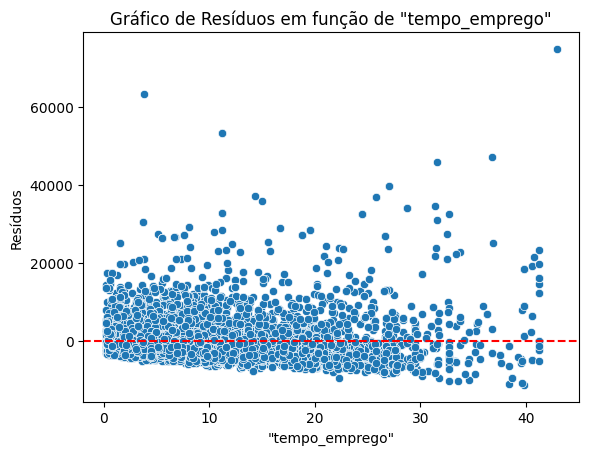

In [419]:
# gráfico de resíduos 

sns.scatterplot(x = 'tempo_emprego', y = 'res_renda', data = df_previsao)
plt.axhline(y  =0, color = 'r', linestyle = '--')

plt.xlabel('"tempo_emprego"')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos em função de "tempo_emprego"')
plt.show()

In [420]:
# regressão múltipla usando "statsmodels.formula.api" - em função de 'renda' sem variáveis - LOGARITMO

reg_original_sem_variaveis_log = smf.ols('np.log(renda) ~  sexo + posse_de_imovel + idade + tempo_emprego', data = df_previsao).fit()

In [421]:
# resíduo - em função de 'renda' - sem variáveis - LOGARITMO

df_previsao['res_renda'] = reg_original_sem_variaveis_log.resid

reg_original_sem_variaveis_log.summary()

# resumo:
# resíduo do y = 'renda'
# R-quadrado = 0.226
# 'P>|t|' maior que 5% = variável não é estatisticamente significante

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     907.7
Date:                Mon, 04 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:21:35   Log-Likelihood:                -13335.
No. Observations:               12466   AIC:                         2.668e+04
Df Residuals:                   12461   BIC:                         2.672e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   7.3732      0.030    243.856      0.000       7.314       7.432
sexo[T.M]                   0.4742      0.013     35.424      0.000       0.448       0.500
posse_de_imovel[T.True]     0.1018      0.013      7.649      0.000       0.076       0.128
idade                       0.0043      0.001      5.958      0.000       0.003       0.006
tempo_emprego               0.0479      0.001     48.283      0.000       0.046       0.050
==============================================================================
Omnibus:                        1.296   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.523   Jarque-Bera (JB):                1.272
Skew:                           0.011   Prob(JB):                        0.529
Kurtosis:                       3.045   Cond. No.                         207.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.
- **Resposta**:
- Observando  o gráfico de resíduos eu não mudaria a regressão. Ele me parece razoável para uma regressão linear múltipla, ou seja, com muitas variaveis (X).